In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [4]:
# Load the dataset with ISO-8859-1 encoding
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
#display the first 10 rows
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [5]:
# Display column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
#Clean and Preprocess Data
# Drop rows with missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert 'Ram' to numeric
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Convert 'Weight' to numeric
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys'], drop_first=True)

In [7]:
#Check Dataset Dimensions
# Display the number of rows and columns in the dataset
df.shape

(1303, 265)

In [9]:
# Identify and display columns with categorical (object) data types
categorical = df.select_dtypes(include="object")
categorical.head()

,Product,ScreenResolution,Memory
0,MacBook Pro,IPS Panel Retina Display 2560x1600,128GB SSD
1,Macbook Air,1440x900,128GB Flash Storage
2,250 G6,Full HD 1920x1080,256GB SSD
3,MacBook Pro,IPS Panel Retina Display 2880x1800,512GB SSD
4,MacBook Pro,IPS Panel Retina Display 2560x1600,256GB SSD


In [10]:
# Identify and display columns with numerical data types
numerical = df.select_dtypes(include=np.number)
numerical.head()

,laptop_ID,Inches,Ram,Weight,Price_euros
0,1,13.3,8,1.37,1339.69
1,2,13.3,8,1.34,898.94
2,3,15.6,8,1.86,575.00
3,4,15.4,16,1.83,2537.45
4,5,13.3,8,1.37,1803.60


In [11]:
# Display column names, non-null counts, and data types for numerical columns
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    1303 non-null   int64  
 1   Inches       1303 non-null   float64
 2   Ram          1303 non-null   int64  
 3   Weight       1303 non-null   float64
 4   Price_euros  1303 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 51.0 KB


In [12]:
# Generate transposed descriptive statistics for numerical columns
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.00,331.5,659.00,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
Ram,1303.0,8.382195,5.084665,2.00,4.0,8.00,8.00,64.0
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.30,4.7
Price_euros,1303.0,1123.686992,699.009043,174.00,599.0,977.00,1487.88,6099.0


In [13]:
# Define features and target variable
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Previous steps...

#  Split Data into Features and Target
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
# Ensure all columns are numeric before training
print("Data types before training:")
print(X_train.dtypes)

# Drop any non-numeric columns (if any)
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_numeric, y_train)

# Confirm that the model has been trained
print("Model training completed.")

Data types before training:
laptop_ID               int64
Product                object
Inches                float64
ScreenResolution       object
Ram                     int64
                       ...   
OpSys_No OS              bool
OpSys_Windows 10         bool
OpSys_Windows 10 S       bool
OpSys_Windows 7          bool
OpSys_macOS              bool
Length: 264, dtype: object
Model training completed.


In [18]:
# Generate predictions for the test set
y_pred = model.predict(X_test_numeric)

In [19]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 228273.81
R-squared: 0.55


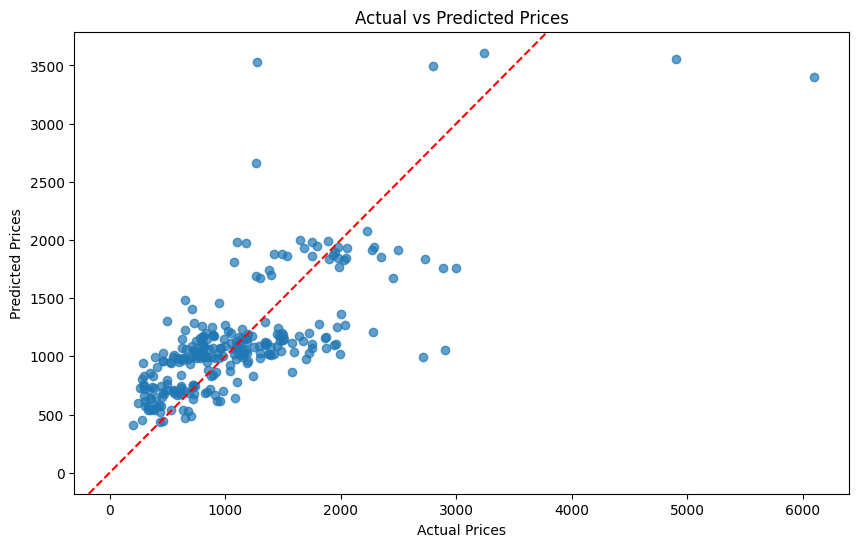

In [20]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.axline((0, 0), slope=1, color='r', linestyle='--')  # Line of equality
plt.show()

In [21]:
# Save the trained model for future use
joblib.dump(model, 'laptop_price_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [22]:
# Create a DataFrame with a single sample for prediction
input_data = {
    'Ram': [8],
    'Weight': [1.5],
    # Include all necessary one-hot encoded features
    # Example of one-hot encoded features:
    'Company_Apple': [0],
    'Company_Asus': [1],
    'TypeName_NoteBook': [0],
    # Add other one-hot encoded columns relevant to your dataset
}

df_input = pd.DataFrame(input_data)

In [23]:
# Load the saved model
model = joblib.load('laptop_price_model.pkl')

In [37]:
# Check the columns used for training
print("Columns used for training:")
X_train.columns.tolist()

Columns used for training:


['laptop_ID',
 'Product',
 'Inches',
 'ScreenResolution',
 'Ram',
 'Memory',
 'Weight',
 'Company_Apple',
 'Company_Asus',
 'Company_Chuwi',
 'Company_Dell',
 'Company_Fujitsu',
 'Company_Google',
 'Company_HP',
 'Company_Huawei',
 'Company_LG',
 'Company_Lenovo',
 'Company_MSI',
 'Company_Mediacom',
 'Company_Microsoft',
 'Company_Razer',
 'Company_Samsung',
 'Company_Toshiba',
 'Company_Vero',
 'Company_Xiaomi',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'Cpu_AMD A10-Series 9620P 2.5GHz',
 'Cpu_AMD A10-Series A10-9620P 2.5GHz',
 'Cpu_AMD A12-Series 9700P 2.5GHz',
 'Cpu_AMD A12-Series 9720P 2.7GHz',
 'Cpu_AMD A12-Series 9720P 3.6GHz',
 'Cpu_AMD A4-Series 7210 2.2GHz',
 'Cpu_AMD A6-Series 7310 2GHz',
 'Cpu_AMD A6-Series 9220 2.5GHz',
 'Cpu_AMD A6-Series 9220 2.9GHz',
 'Cpu_AMD A6-Series A6-9220 2.5GHz',
 'Cpu_AMD A8-Series 7410 2.2GHz',
 'Cpu_AMD A9-Series 9410 2.9GHz',
 'Cpu_AMD A9-Series 9420 2.9GHz',
 'Cpu_AMD A9-S

In [38]:
# Create a DataFrame with a single sample for prediction
input_data = {
    'Ram': [8],
    'Weight': [1.5],
    # Include all necessary one-hot encoded features based on training columns
    'Company_Apple': [0],
    'Company_Asus': [1],
    'Company_Chuwi': [0],
    'Company_Dell': [0],
    'Company_HP': [0],
    'Company_Lenovo': [0],
    'Company_MSI': [0],
    'TypeName_NoteBook': [0],
    'TypeName_Gaming': [1],
    'TypeName_Ultrabook': [0],
    'Cpu_Intel Core i5': [1],
    'Cpu_Intel Core i7': [0],
    'Cpu_Intel Core i3': [0],
    'Gpu_NVIDIA GeForce GTX 1050': [1],
    'OpSys_Windows 10': [1],
    'OpSys_macOS': [0],
    # Add any additional required features here
}

df_input = pd.DataFrame(input_data)

# Display input DataFrame columns
print("Input DataFrame columns:")
df_input.columns.tolist()

Input DataFrame columns:


['Ram',
 'Weight',
 'Company_Apple',
 'Company_Asus',
 'Company_Chuwi',
 'Company_Dell',
 'Company_HP',
 'Company_Lenovo',
 'Company_MSI',
 'TypeName_NoteBook',
 'TypeName_Gaming',
 'TypeName_Ultrabook',
 'Cpu_Intel Core i5',
 'Cpu_Intel Core i7',
 'Cpu_Intel Core i3',
 'Gpu_NVIDIA GeForce GTX 1050',
 'OpSys_Windows 10',
 'OpSys_macOS']

In [39]:
# Ensure the DataFrame has the same columns as the training data
df_input = df_input.reindex(columns=X_train.columns, fill_value=0)

# Display the updated input DataFrame
print("Reindexed Input DataFrame:")
df_input

Reindexed Input DataFrame:


,laptop_ID,Product,Inches,ScreenResolution,Ram,Memory,Weight,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,0,0,0,0,8,0,1.5,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
# Predict the price for the input sample
try:
    predicted_price = model.predict(df_input)[0]
    print(f'Predicted Price: {predicted_price:.2f} Euros')
except ValueError as e:
    print("Error during prediction:", e)

Error during prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Company_Apple
- Company_Asus
- Company_Chuwi
- Company_Dell
- Company_Fujitsu
- ...

